# Project 2: Loan Approval Prediction using Classification

**Name:** Devashish Mahato  
**Roll No:** 25/DSBA-T12/OCT-7541    
**Program:**  Data Science and Business Analytics /DA(October 2025 Batch)  
 

## Objective
To predict whether a loan application will be approved based on applicant
details such as income, credit history, employment status, and loan amount.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


In [3]:
import os
os.getcwd()


'/home/aaffb9ac-6af8-4b15-9d93-8ed18b57737b/Devashish_Mahato_Major_Project/Dataset'

In [5]:
os.chdir("/home/aaffb9ac-6af8-4b15-9d93-8ed18b57737b/Devashish_Mahato_Major_Project/Dataset")
os.getcwd()


'/home/aaffb9ac-6af8-4b15-9d93-8ed18b57737b/Devashish_Mahato_Major_Project/Dataset'

In [8]:
import os
os.listdir()


['.ipynb_checkpoints',
 'Bengaluru_House_Data.csv',
 'train_u6lujuX_CVtuZ9i (1).csv',
 'Untitled.ipynb']

In [10]:
import pandas as pd

df = pd.read_csv("loan.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Overview

This dataset contains information about loan applicants including gender,
education, income, credit history, and loan amount.

The goal of this project is to predict whether a loan application will be
approved or not.

**Target Variable:** Loan_Status


In [11]:
df.shape


(614, 13)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Cleaning

In [16]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is performed to understand the distribution of data,
relationships between variables, and patterns that may influence loan approval.


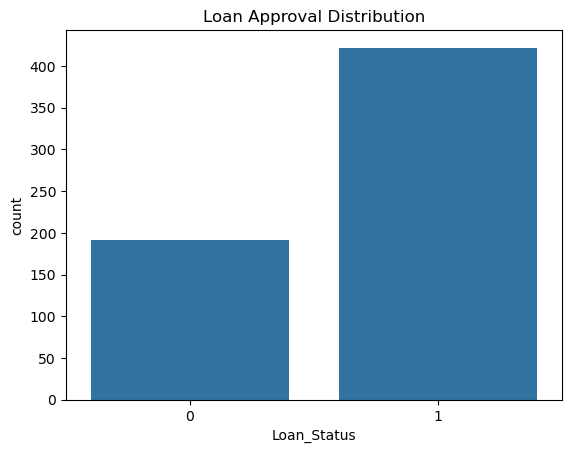

In [20]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Distribution")
plt.show()


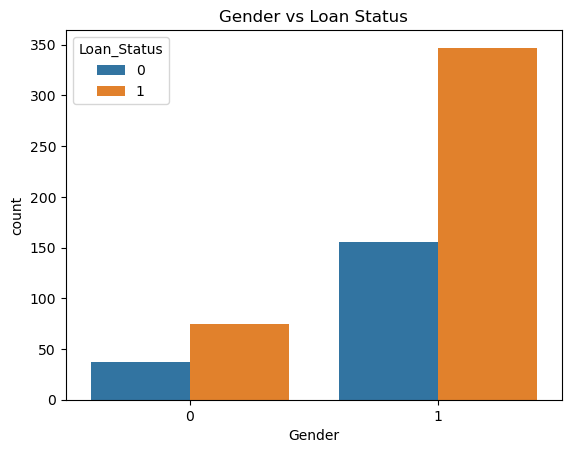

In [21]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title("Gender vs Loan Status")
plt.show()


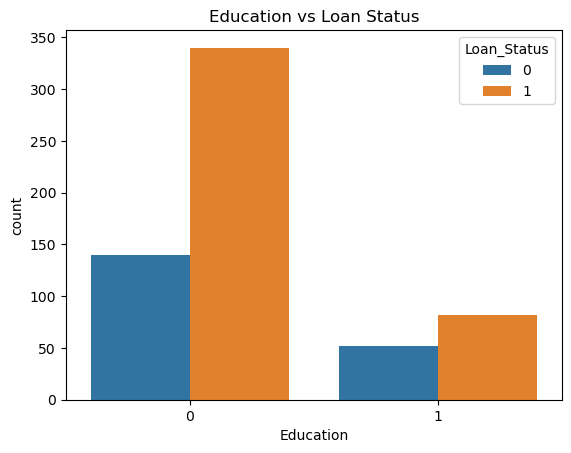

In [22]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()


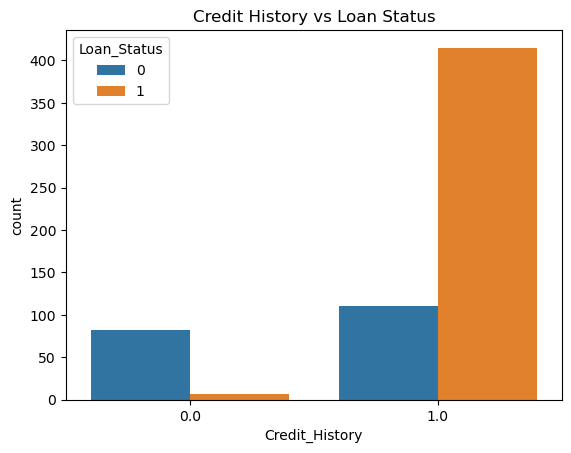

In [23]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Credit History vs Loan Status")
plt.show()


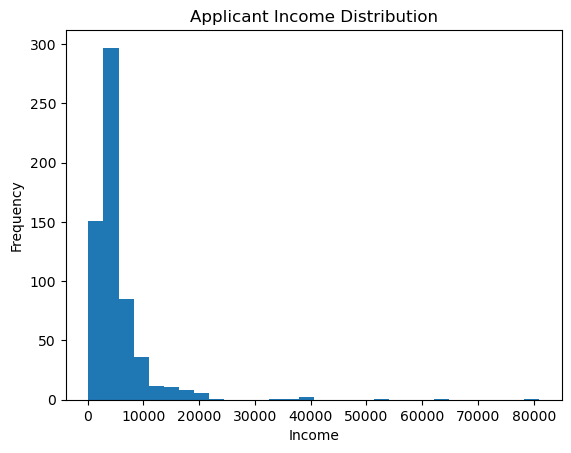

In [24]:
plt.hist(df['ApplicantIncome'], bins=30)
plt.title("Applicant Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


### EDA Observations

- Applicants with a good credit history have a higher loan approval rate.
- Graduate applicants are more likely to receive loan approval.
- Income distribution is right-skewed, indicating the presence of outliers.
- Loan approval is slightly imbalanced but suitable for classification.


## Feature Encoding

In [25]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Feature and Target Separation

In [28]:
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']


## Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Building

In [33]:
lr = LogisticRegression(max_iter=2000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Evaluation

In [34]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }


## Evaluation Results

In [35]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        evaluate_model(lr, X_test, y_test)["Accuracy"],
        evaluate_model(dt, X_test, y_test)["Accuracy"],
        evaluate_model(rf, X_test, y_test)["Accuracy"]
    ],
    "Precision": [
        evaluate_model(lr, X_test, y_test)["Precision"],
        evaluate_model(dt, X_test, y_test)["Precision"],
        evaluate_model(rf, X_test, y_test)["Precision"]
    ],
    "Recall": [
        evaluate_model(lr, X_test, y_test)["Recall"],
        evaluate_model(dt, X_test, y_test)["Recall"],
        evaluate_model(rf, X_test, y_test)["Recall"]
    ],
    "F1 Score": [
        evaluate_model(lr, X_test, y_test)["F1 Score"],
        evaluate_model(dt, X_test, y_test)["F1 Score"],
        evaluate_model(rf, X_test, y_test)["F1 Score"]
    ]
})

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.788618,0.759615,0.9875,0.858696
1,Decision Tree,0.691057,0.750000,0.7875,0.768293
2,Random Forest,0.780488,0.757282,0.9750,0.852459


## Confusion Matrix

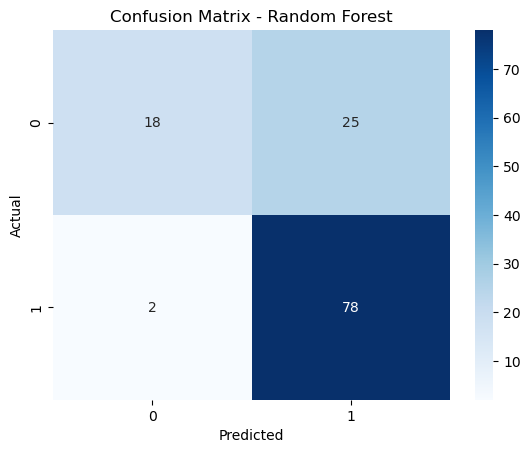

In [36]:
cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Conclusion

Among all the classification models used, the Random Forest Classifier performed
the best with the highest accuracy and F1 score.

This indicates that ensemble learning methods are effective in capturing complex
patterns in loan approval data. The model can assist financial institutions in
making faster and more reliable loan approval decisions.
